In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Libraries imported

In [20]:
#data organising
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
path="https://drive.google.com/drive/u/0/my-drive"
data=pd.read_csv(url)
print("data succussfully imported")
data.head(10)

data succussfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**data is tabulated and lets get some info**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


***Here ,the info of the data***

**Now lets discover and visualize the data**

In [18]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


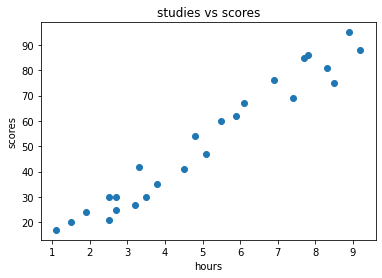

In [25]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("studies vs scores")
plt.show()

***MAchine learning algo for preparing the data***

In [30]:
#cleansing the data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [31]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [40]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Spliting dataset for training**

In [53]:
x=data.drop("Scores",axis="columns")
y=data.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.2, random_state=48) 

In [58]:
print("shape of X train",X_train.shape)
print("shape of Y train",Y_train.shape)
print("shape of X test",X_train.shape)
print("shape of Y test",Y_train.shape)


shape of X train (20, 1)
shape of Y train (20, 1)
shape of X test (20, 1)
shape of Y test (20, 1)


**Selecting a model to train**

In [61]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [62]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
LR.coef_

array([[10.01600159]])

In [64]:
LR.intercept_

array([1.37183224])

In [65]:
LR.predict([[5]])[0][0].round(3)

51.452

**graph model**

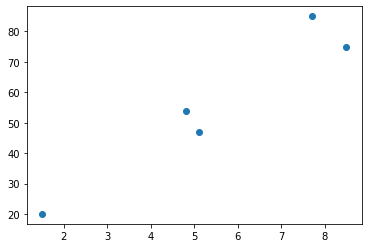

In [75]:
plt.scatter(X_test,Y_test)

In [68]:
Y_pred=LR.predict(X_test)
Y_pred

array([[86.50784574],
       [78.49504447],
       [49.44863987],
       [52.45344034],
       [16.39583463]])

In [74]:
pd.DataFrame(np.c_[X_test,Y_test,Y_pred], columns=["Hours_studied","Original_marks","predicted_Marks"])

,Hours_studied,Original_marks,predicted_Marks
0,8.5,75.0,86.507846
1,7.7,85.0,78.495044
2,4.8,54.0,49.448640
3,5.1,47.0,52.453440
4,1.5,20.0,16.395835


**Margining the graph**

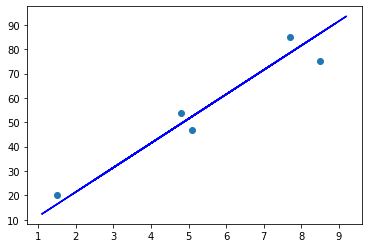

In [76]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,LR.predict(X_train),color="blue")

***Final Solution to the Prob***

In [77]:
import joblib
joblib.dump(LR,"Predicting stu info.ipynb")

['Predicting stu info.ipynb']

In [78]:
model=joblib.load("Predicting stu info.ipynb")

***Predicying the final model***

In [82]:
model.predict([[8]])

array([[81.49984495]])